In [103]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math  

############# Skewness
from scipy.stats import skew

In [104]:
df = pd.read_csv(r'D:\Data\Chetan\housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [106]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [107]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [108]:
from sklearn.neighbors import KNeighborsRegressor

# function that imputes a dataframe 
def impute_knn(df):
    
    ''' inputs: pandas df containing feature matrix '''
    ''' outputs: dataframe with NaN imputed '''
    # imputation with KNN unsupervised method

    # separate dataframe into numerical/categorical
    ldf = df.select_dtypes(include=[np.number])           # select numerical columns in df
    ldf_putaside = df.select_dtypes(exclude=[np.number])  # select categorical columns in df
    # define columns w/ and w/o missing data
    cols_nan = ldf.columns[ldf.isna().any()].tolist()         # columns w/ nan 
    cols_no_nan = ldf.columns.difference(cols_nan).values     # columns w/o nan 

    for col in cols_nan:                
        imp_test = ldf[ldf[col].isna()]   # indicies which have missing data will become our test set
        imp_train = ldf.dropna()          # all indicies which which have no missing data 
        model = KNeighborsRegressor(n_neighbors=5)  # KNR Unsupervised Approach
        knr = model.fit(imp_train[cols_no_nan], imp_train[col])
        ldf.loc[df[col].isna(), col] = knr.predict(imp_test[cols_no_nan])
    
    return pd.concat([ldf,ldf_putaside],axis=1)

In [109]:
# Call function that imputes missing data
df2 = impute_knn(df)
# looks like we have a full feature matrix
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [110]:
def eliminate_outliers(table):
    a=table.select_dtypes(include=[np.number]).columns.tolist()
    for i in a:
        q1 = table[i].quantile(0.25)
        q3 = table[i].quantile(0.75)
        
        iqr = q3-q1 #Interquartile range

        upper_limit = q3+1.5*iqr 
        lower_limit = q1-1.5*iqr
    
        #print("Upper limit = ",upper_limit)
        #print("Lower limit = ",lower_limit)

        table[i]=np.where(table[i] > upper_limit,upper_limit,table[i]) # upper limit
        table[i]=np.where(table[i] < lower_limit,lower_limit,table[i]) # lower limit

<Axes: >

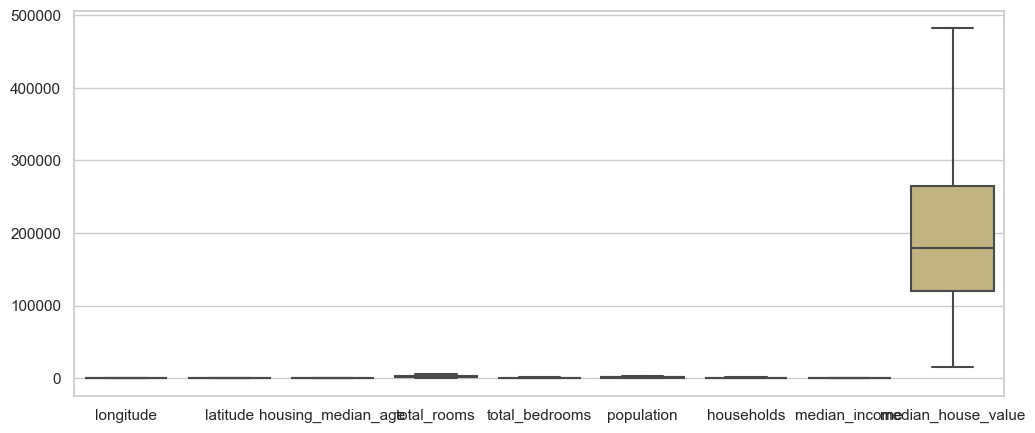

In [111]:
eliminate_outliers(df2)

fig, axarr  = plt.subplots(figsize=(12,5))
sns.boxplot(data=df2)

In [112]:
df3 = df2.drop(["ocean_proximity"],axis=1)

longitude
-0.29777956498586855


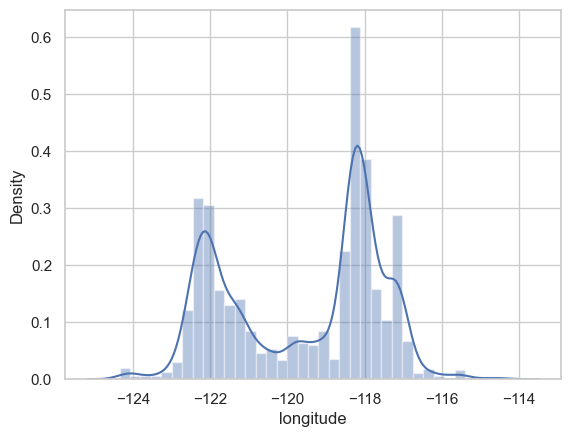

latitude
0.46591914016270397


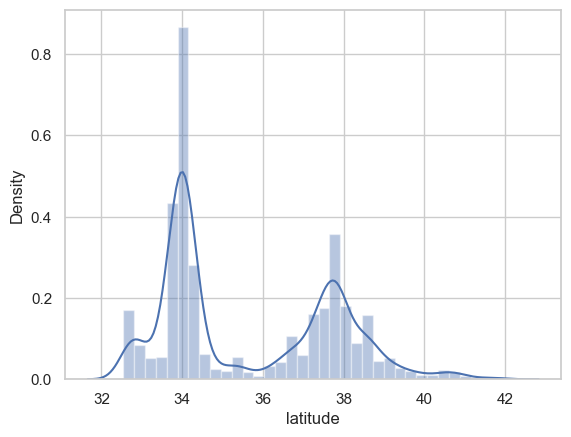

housing_median_age
0.06032625301661101


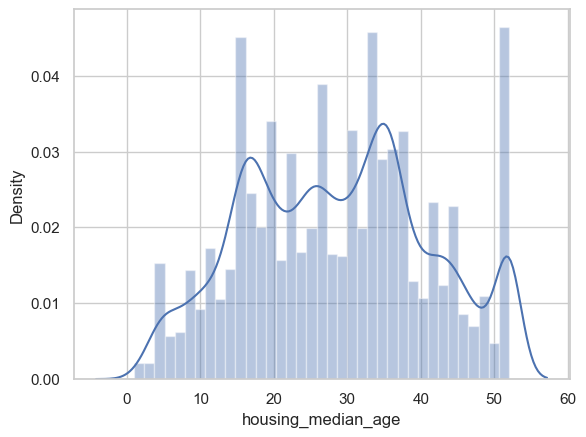

total_rooms
0.8445958087777492


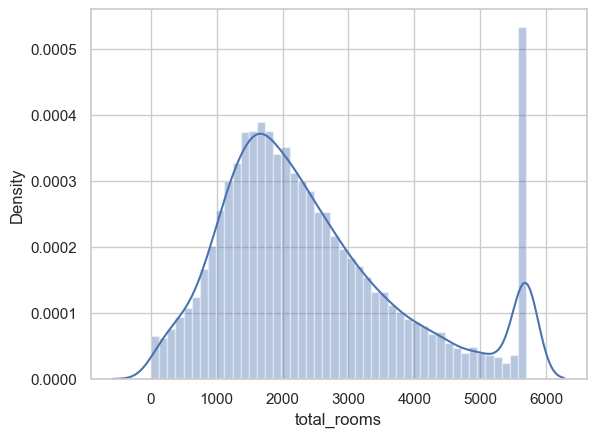

total_bedrooms
0.8658105087805025


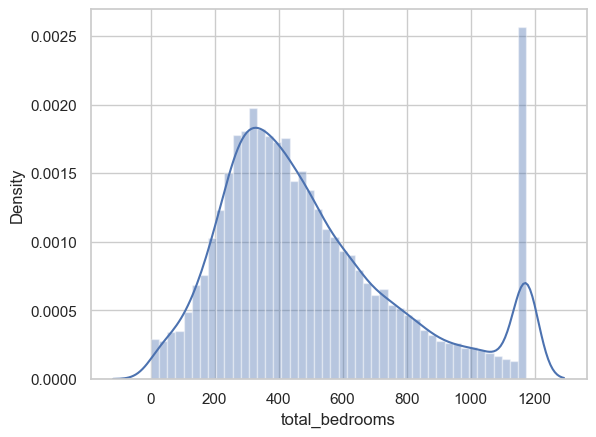

population
0.8421860776931033


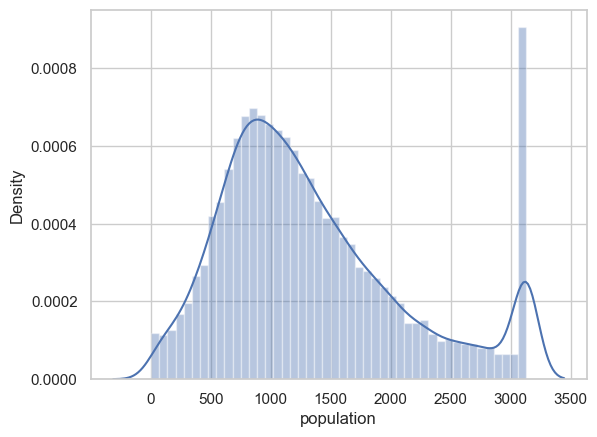

households
0.8449228923356494


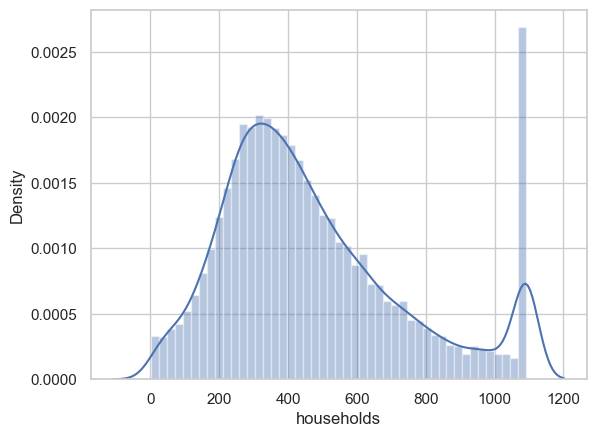

median_income
0.7355645108313859


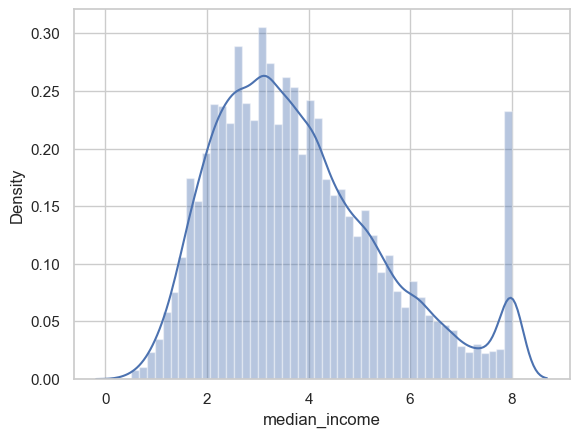

median_house_value
0.9122641743677421


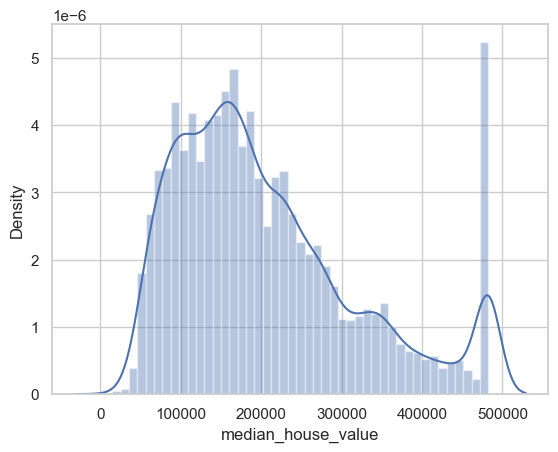

In [113]:
for col in df3:
    print(col)
    print(skew(df3[col]))
    
    plt.figure()
    sns.distplot(df3[col])
    plt.show()

In [114]:
# Putting feature variable to X
X = df3.drop('median_house_value', axis= 1)

# Putting response variable to y
y = df3[['median_house_value']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=100)

In [115]:
X_train.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [116]:
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

In [117]:
data = pd.concat([y_train, X_train], axis=1)
data

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13593,69500.0,-117.28,34.11,39.0,1573.000,418.0,1258.0,359.0,1.489600
3507,210300.0,-118.46,34.26,33.0,1358.000,247.0,738.0,235.0,5.094700
6780,364900.0,-118.15,34.10,39.0,3856.000,867.0,1847.0,830.0,3.455900
8087,209900.0,-118.20,33.81,47.0,2347.000,437.0,1219.0,420.0,5.309600
3001,81600.0,-119.02,35.30,10.0,5698.375,1173.5,3132.0,1092.5,3.636900
...,...,...,...,...,...,...,...,...,...
16304,242000.0,-121.37,38.01,15.0,2430.000,315.0,1016.0,314.0,8.013025
79,131300.0,-122.28,37.80,38.0,684.000,176.0,344.0,155.0,2.011400
12119,197700.0,-117.21,33.97,3.0,5698.375,1173.5,3132.0,1092.5,5.640900
14147,135100.0,-117.08,32.74,35.0,1434.000,253.0,753.0,228.0,2.381200


In [118]:
data.corr()

,median_house_value,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
median_house_value,1.000000,-0.052048,-0.138885,0.106115,0.169397,0.059230,-0.031687,0.076862,0.684683
longitude,-0.052048,1.000000,-0.925460,-0.107356,0.033252,0.066279,0.117284,0.057818,-0.023431
latitude,-0.138885,-0.925460,1.000000,0.011281,-0.030595,-0.069170,-0.133532,-0.081114,-0.077187
housing_median_age,0.106115,-0.107356,0.011281,1.000000,-0.386041,-0.333917,-0.309958,-0.310688,-0.143703
total_rooms,0.169397,0.033252,-0.030595,-0.386041,1.000000,0.917992,0.829738,0.908718,0.246838
total_bedrooms,0.059230,0.066279,-0.069170,-0.333917,0.917992,1.000000,0.873540,0.977074,-0.015730
population,-0.031687,0.117284,-0.133532,-0.309958,0.829738,0.873540,1.000000,0.905058,0.000210
households,0.076862,0.057818,-0.081114,-0.310688,0.908718,0.977074,0.905058,1.000000,0.012434
median_income,0.684683,-0.023431,-0.077187,-0.143703,0.246838,-0.015730,0.000210,0.012434,1.000000


<Axes: >

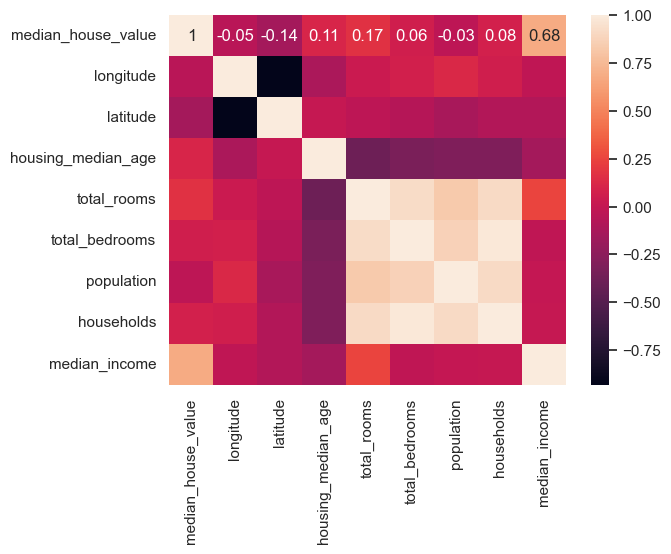

In [119]:
sns.heatmap(np.round(data.corr(),2),annot = True)

<Axes: title={'center': 'House_Price VS Median Income'}, xlabel='median_house_value', ylabel='median_income'>

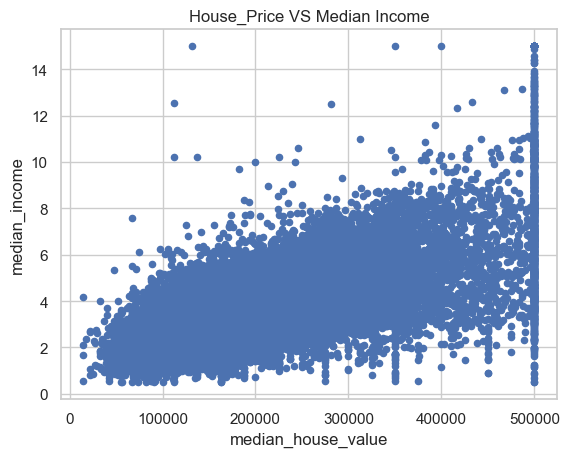

In [120]:
df.plot.scatter(x='median_house_value',y='median_income',title='House_Price VS Median Income')

<Axes: title={'center': 'House_Price VS Median Housing age'}, xlabel='median_house_value', ylabel='housing_median_age'>

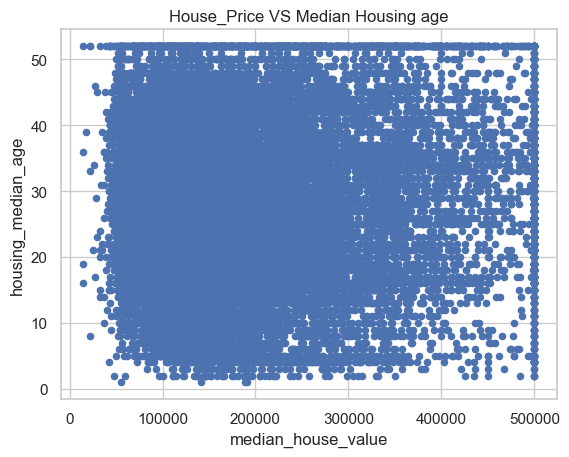

In [121]:
df.plot.scatter(x='median_house_value',y='housing_median_age',title='House_Price VS Median Housing age')

In [122]:
data.isnull().sum()

median_house_value    0
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14447 entries, 13593 to 5640
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  14447 non-null  float64
 1   longitude           14447 non-null  float64
 2   latitude            14447 non-null  float64
 3   housing_median_age  14447 non-null  float64
 4   total_rooms         14447 non-null  float64
 5   total_bedrooms      14447 non-null  float64
 6   population          14447 non-null  float64
 7   households          14447 non-null  float64
 8   median_income       14447 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [124]:
data = data.dropna()

In [125]:
# X1=df.drop(['PriceEuro','Efficiency_WhKm','TopSpeed_KmH'],axis=1)
X1 = data.drop(["median_house_value","longitude","latitude","total_bedrooms","households"],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before

housing_median_age     3.387905
total_rooms           16.752571
population            13.765243
median_income          5.487264
dtype: float64

### Model Builiding
* Ho - There is no linear relationship between median_house_value and housing_median_age, total_rooms, population, median_income.

vs

* Ho - There is a linear relationship between median_house_value and housing_median_age, total_rooms, population, median_income.
* alpha = 5%(0.05)

In [126]:
import statsmodels.formula.api as smf
model = smf.ols('median_house_value ~ housing_median_age +total_rooms + population + median_income',data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     3943.
Date:                Tue, 18 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:22:49   Log-Likelihood:            -1.8331e+05
No. Observations:               14447   AIC:                         3.666e+05
Df Residuals:                   14442   BIC:                         3.667e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.447e+04   2947.786    -15.084      0.000   -5.02e+04   -3.87e+04
housing_median_age  2162.0870     55.991     38.615      0.000    2052.338    2271.837
total_rooms           15.8449      0.944     16.785      0.000      13.995      17.695
population           -17.7485      1.642    -10.809      0.000     -20.967     -14.530
median_income       4.584e+04    438.816    104.463      0.000     4.5e+04    4.67e+04
==============================================================================
Omnibus:                     2714.831   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6011.182
Skew:                           1.087   Prob(JB):                         0.00
Kurtosis:                       5.293   Cond. No.                     1.45e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Manual prediction
* y = -4.308e+04 + 1975.4941 * housing_median_age + 5.3776 * population + 4.895e+04 * median_income

## Ridge regularization

In [127]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [128]:
# from sklearn.linear_model import Ridge

# Define the model with a regularization parameter (alpha)
model = Ridge(alpha=1.0)

# Fit the model to your data (X: features, y: target variable)
model.fit(X_train, y_train)

Ridge()

In [129]:
# Make predictions on the training data itself
predictions = model.predict(X_train)

In [130]:
# Analyze coefficients
sparse_coef = model.coef_  # Check which coefficients are zero

In [131]:
r2 = r2_score(y_train, predictions)

In [132]:
# Calculate Adjusted R-squared for the training set (adjusts for number of features)
n = len(X_train)  # Number of observations
p = X_train.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print("R-squared (training set):", r2)
print("Adjusted R-squared (training set):", adjusted_r2)

R-squared (training set): 0.6538018797450618
Adjusted R-squared (training set): 0.6536100536637458


## Lasso Regularization

In [133]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

# Define the model with a regularization parameter (alpha)
model = Lasso(alpha=0.1)  # You can adjust the alpha value for better performance

# Fit the model to your training data (X_train: features, t_train: target variable)
model.fit(X_train, y_train)

# Make predictions on the training data itself
predictions = model.predict(X_train)

# Calculate R-squared (coefficient of determination) for the training set
r2 = r2_score(y_train, predictions)

# Calculate Adjusted R-squared for the training set (adjusts for number of features)
n = len(X_train)  # Number of observations
p = X_train.shape[1]  # Number of features

adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print("R-squared (training set):", r2)
print("Adjusted R-squared (training set):", adjusted_r2)

# Analyze model coefficients to see which features were selected by Lasso
sparse_coef = model.coef_  # Check which coefficients are zero (indicates feature selection)
print("Selected features (non-zero coefficients):", np.where(sparse_coef != 0)[0])  # Optional



R-squared (training set): 0.6538018837607289
Adjusted R-squared (training set): 0.653610057681638
Selected features (non-zero coefficients): [0 1 2 3 4 5 6 7]


## Final Conclusion
* The accuracy of Simple linear regression, Ridge regression and Lasso regression models is not satisfactory.
* All 3 models are underfit models.
* We can not continue with these models.